# **Understanding the shopping trends of customers in USA.**

Dataset link: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing 'Shopping Trends' dataset

In [ ]:
df = pd.read_csv("shopping_trends_updated.csv", header= 0)

Checking the first 5 rows of the dataset

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Checking the data type of all the columns

In [ ]:
df.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

Checking if any cells have '?' as data and replacing it with the numpy nan

In [ ]:
df= df.replace('?',np.nan)

Checking for Null values in the datase

In [ ]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

Checking the shape of the dataset

In [ ]:
df.shape

(3900, 19)

Checking summary of the rows and columns using info function

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

Checking the summary statistics of the numerical columns

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
df_Gender = df["Gender"].value_counts()
df_Gender

Male      2652
Female    1248
Name: Gender, dtype: int64

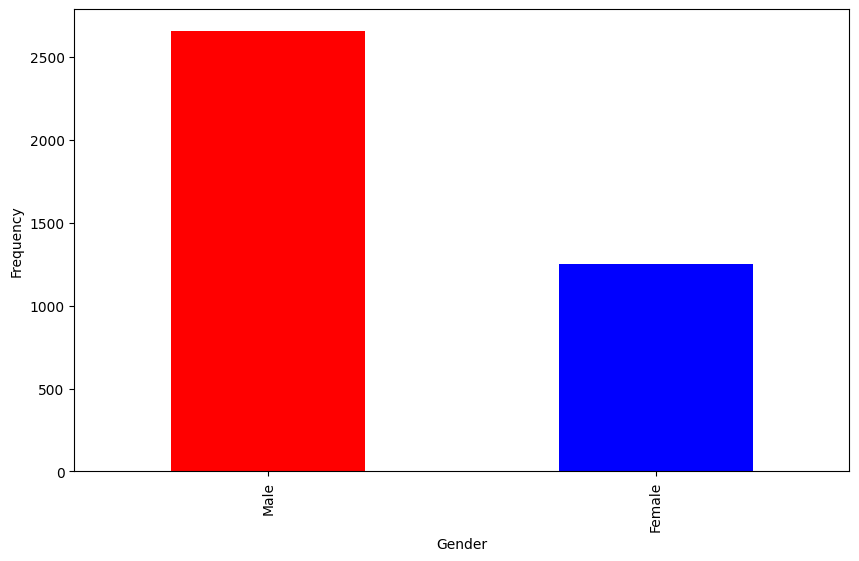

In [ ]:
df.Gender.value_counts().plot(kind='bar',figsize=(10,6),color=["red","blue"])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

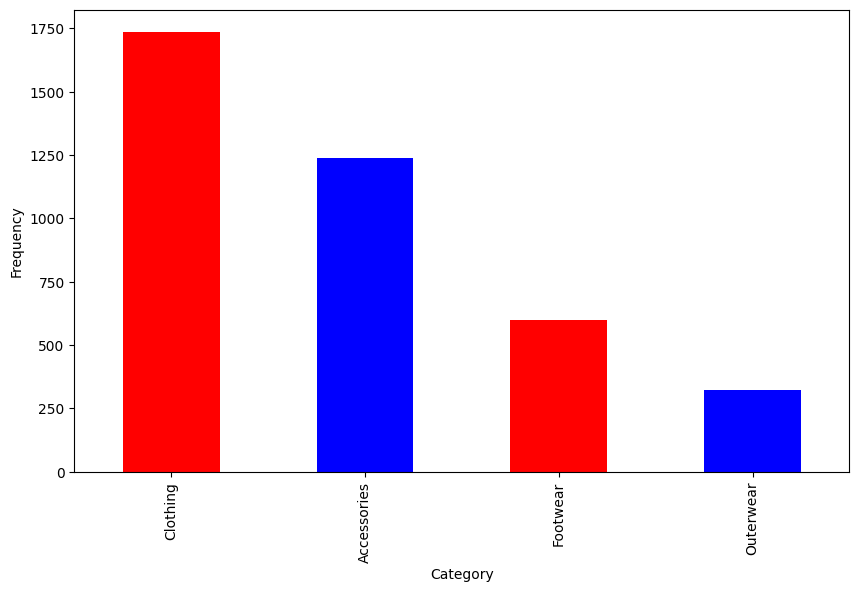

In [ ]:
df.Category.value_counts().plot(kind='bar',figsize=(10,6),color=["red","blue"])
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

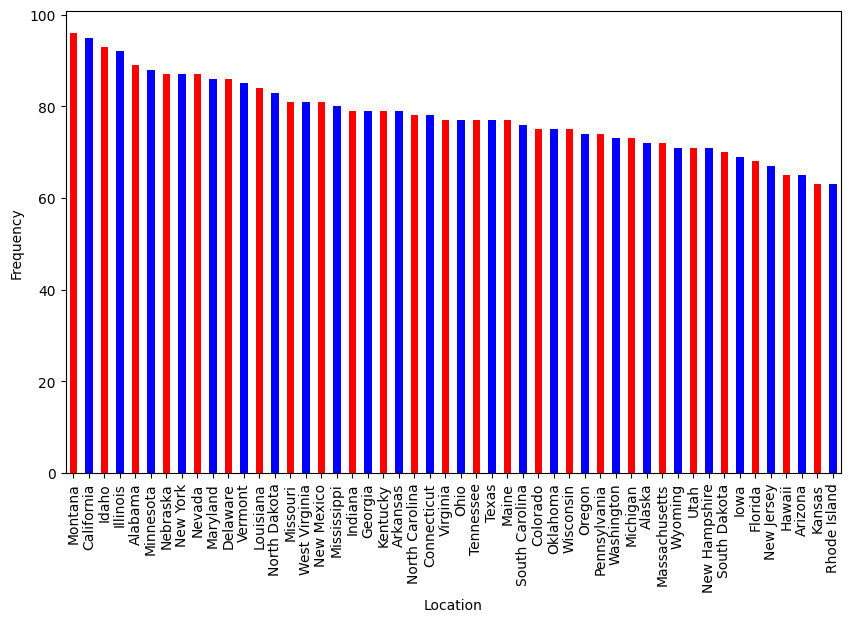

In [ ]:
df.Location.value_counts().plot(kind='bar',figsize=(10,6),color=["red","blue"])
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# We want to group by Location and Purchase amount and plt a bar graph of it

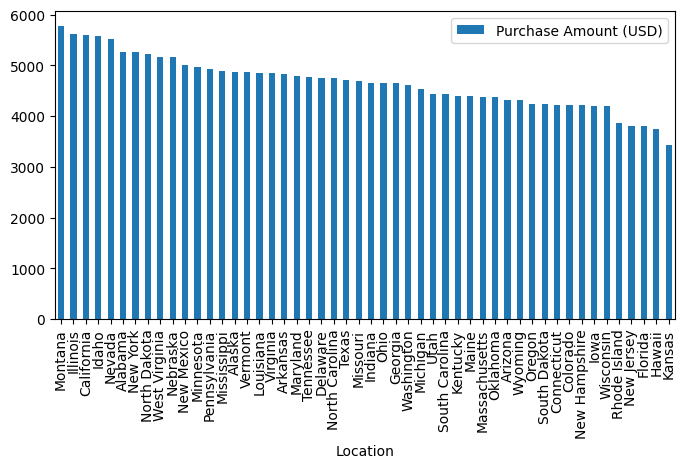

In [ ]:
df_l=df[['Location','Purchase Amount (USD)']].groupby(by='Location').sum().sort_values(by="Purchase Amount (USD)",ascending=False,axis=0)
df_l
df_l.plot(kind='bar',figsize=(8,4))
plt.show()

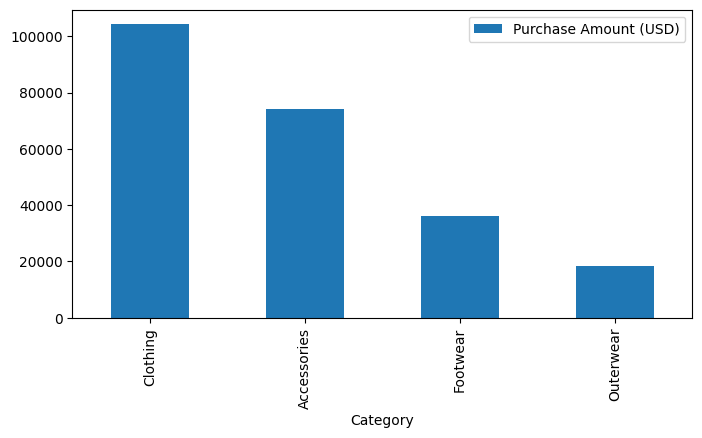

In [ ]:
df_c=df[['Category','Purchase Amount (USD)']].groupby(by='Category').sum().sort_values(by="Purchase Amount (USD)",ascending=False,axis=0)
df_c
df_c.plot(kind='bar',figsize=(8,4))
plt.show()

Finding Mean purchase amount for different categories

In [ ]:
df_cm=df[['Category','Purchase Amount (USD)']].groupby(by='Category').mean().round(2).sort_values(by="Purchase Amount (USD)",ascending=False,axis=0)
print(df_cm)
print()
print(df.Category.value_counts())


             Purchase Amount (USD)
Category                          
Footwear                     60.26
Clothing                     60.03
Accessories                  59.84
Outerwear                    57.17

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64


In [ ]:
df_maxr=df[['Customer ID','Category','Previous Purchases']].groupby(by=['Customer ID','Category']).sum().sort_values(by="Previous Purchases",ascending=False,axis=0)
df_maxr

,,Previous Purchases
Customer ID,Category,
3262,Accessories,50
634,Footwear,50
2263,Accessories,50
2265,Accessories,50
125,Clothing,50
...,...,...
3665,Outerwear,1
1696,Accessories,1
1386,Accessories,1


Q-1 What is the average age of customers in the dataset?

In [ ]:
Average_customer_age=df['Age'].mean().round(2)
print('Average age of customer=',Average_customer_age,'years')

Average age of customer= 44.07 years


Q-2 What is the most common item purchased?

In [ ]:
cmi=df['Item Purchased'].value_counts().idxmax()
print('The most common item puchased is:-',cmi)

The most common item puchased is:- Blouse


Q-3 What is the total purchase amount for each category?

In [ ]:
cpa=df[['Category','Purchase Amount (USD)']].groupby(by='Category').sum().sort_values(by="Purchase Amount (USD)",ascending=False,axis=0)
cpa

,Purchase Amount (USD)
Category,
Clothing,104264
Accessories,74200
Footwear,36093
Outerwear,18524


Q-4 What is the average review rating for male customers and female customers separately ?

In [ ]:
arr=df[['Gender','Review Rating']].groupby(by='Gender').mean().round(2)
arr.rename(columns={'Review Rating':'Avg. review rating'},inplace=True)
arr

,Avg. review rating
Gender,
Female,3.74
Male,3.75


Q-5 What is the most common payment method used by customers ?

In [ ]:
mcp=df['Payment Method'].value_counts().idxmax()
print('The most common payment method used by customers is:-',mcp)

The most common payment method used by customers is:- Credit Card


Q-6 What is the median purchase amount (USD) ?

In [ ]:
mpa=df['Purchase Amount (USD)'].median()
print('The median purchase amount is:-',mpa,'$')

The median purchase amount is:- 60.0 $


Q-7 How many customers have opted for the Subscription ?

In [ ]:
df['Customer ID'].duplicated().sum()  #Result:- No duplicates found in customer id column
cwp=df[df['Subscription Status']=='Yes']['Subscription Status'].value_counts().sum()
cwp_p=cwp/df.shape[0]*100
print(cwp,'customers have opted for the Subscription. This accounts for',cwp_p,'%')


1053 customers have opted for the Subscription. This accounts for 27.0 %


Q-8 What is the average purchase amount for customers with a subscription status of 'Yes' and 'No' ?


In [ ]:
apa=df[['Subscription Status','Purchase Amount (USD)']].groupby(by='Subscription Status').mean().round(2)
apa.rename(columns={'Purchase Amount (USD)':'Avg. purchase amount'},inplace=True)
apa

,Avg. purchase amount
Subscription Status,
No,59.87
Yes,59.49


Q-9 What is the most common season for purchases ?

In [ ]:
mcs=df['Season'].value_counts().idxmax()
print('The most common season for purchasing is:-',mcs)

The most common season for purchasing is:- Spring


Q-10 What is the total purchase amount for each gender ?

In [ ]:
tpag=df[["Gender","Purchase Amount (USD)"]].groupby(by='Gender').sum()
tpag

,Purchase Amount (USD)
Gender,
Female,75191
Male,157890


Q-11 What is the average age of customers who made purchases in the Summer season ?

In [ ]:
avg_cust=df[['Age','Season']].groupby(by='Season').mean().round(2)
avg_cust=avg_cust.reset_index()
avg_cust.rename(columns={'Age':'Avg_age'},inplace=True)
avg_age=avg_cust[avg_cust['Season']=='Summer'].iloc[0,1]
print('The average age of customers who made purchases in the Summer season:-',avg_age,'years')


The average age of customers who made purchases in the Summer season:- 43.97 years


Q-12 How many customers used a promo code for their purchase ?

In [ ]:
cupc=df[df['Promo Code Used']=='Yes']['Promo Code Used'].count()
print(cupc,'customers used a promo code for their purchase')

1677 customers used a promo code for their purchase


Q-13 What is the maximum and minimum review rating in the dataset ?

In [ ]:
marr=df['Review Rating'].max()
mirr=df['Review Rating'].min()
print('The maximum and minimun review ratings are',marr,'and',mirr,'respectively')

The maximum and minimun review ratings are 5.0 and 2.5 respectively


Q-15 What is the most common shipping type for customers with a review rating above 4 ?

In [ ]:
mcst=df[df['Review Rating']>4]['Shipping Type'].value_counts().idxmax()
print('The most common shipping type for customers with a review rating above 4 is:-',mcst)

The most common shipping type for customers with a review rating above 4 is:- Standard


Q-16 How many customers have made more than 30 previous purchases ?

In [ ]:
cwpp=df[df['Previous Purchases']>30]['Customer ID'].count()
print(cwpp,'customers have made more than 30 previous purchases')

1549 customers have made more than 30 previous purchases


Q-17 What is the average purchase amount for customers who have made more than 30 previous purchases ?

In [ ]:
capp=df[df['Previous Purchases']>30]['Purchase Amount (USD)'].mean().round(2)
print('The average purchase amount for customers who have made more than 30 previous purchases=',capp,'$')

The average purchase amount for customers who have made more than 30 previous purchases= 60.03 $


Q-18 What is the most common payment method for customers who shop in the Winter season ?

In [ ]:
mcppw=df[df['Season']=='Winter']['Payment Method'].value_counts().idxmax()
print(mcppw,'is the most common payment method for customers who shop in the Winter season')

Credit Card is the most common payment method for customers who shop in the Winter season


Q-19 What is the total purchase amount for customers with a 'Free Shipping' shipping type ?

In [ ]:
tpafs=df[df['Shipping Type']=='Free Shipping']['Purchase Amount (USD)'].sum()
print("The total purchase amount for customers with a 'Free Shipping' shipping type=",tpafs,'$')

The total purchase amount for customers with a 'Free Shipping' shipping type= 40777 $


Q-20 What is the average purchase amount for customers who used a discount ?

In [ ]:
apad=df[df['Discount Applied']=='Yes']['Purchase Amount (USD)'].mean().round(2)
print('The average purchase amount for customers who used a discount:-',apad,'$')

The average purchase amount for customers who used a discount:- 59.28 $


Q-21 What is the most common category of items purchased by female customers with a review rating below 3 ?

In [ ]:
mcc=df[(df['Gender']=='Female') & (df['Review Rating']<3)]['Category'].value_counts().idxmax()
print(mcc,'is the most common category of items purchased by female customers with a review rating below 3')

Clothing is the most common category of items purchased by female customers with a review rating below 3


Q-22 What is the average age of customers who made purchases with a review rating above 4 and used a promo code?

In [ ]:
aac=df[(df['Promo Code Used']=='Yes')&(df['Review Rating']>4)]['Age'].mean().round(2)
print('The average age of customers who made purchases with a review rating above 4 and used a promo code:-',aac,'years')

The average age of customers who made purchases with a review rating above 4 and used a promo code:- 43.99 years


Q-23 What is the total purchase amount for customers in each location ?

In [ ]:
tpal=df[['Location','Purchase Amount (USD)']].groupby(by='Location').sum().sort_values('Purchase Amount (USD)',ascending=False,axis=0)
tpal=tpal.reset_index()
tpal.rename(columns={'Purchase Amount (USD)':'Total Purchase Amount(USD)'},inplace=True)
tpal

,Location,Total Purchase Amount(USD)
0,Montana,5784
1,Illinois,5617
2,California,5605
3,Idaho,5587
4,Nevada,5514
5,Alabama,5261
6,New York,5257
7,North Dakota,5220
8,West Virginia,5174
9,Nebraska,5172


Q-24 What is the average purchase amount for customers who have a subscription and used Venmo as the payment method ?

In [ ]:
apasv=df[(df['Subscription Status']=='Yes')&(df['Payment Method']=='Venmo')]['Purchase Amount (USD)'].mean().round(2)
print('The average purchase amount for customers who have a subscription and used Venmo as the payment method:-',apasv,'$')

The average purchase amount for customers who have a subscription and used Venmo as the payment method:- 60.71 $


Q-25 What is the frequency distribution of the 'Frequency of Purchases' column ?

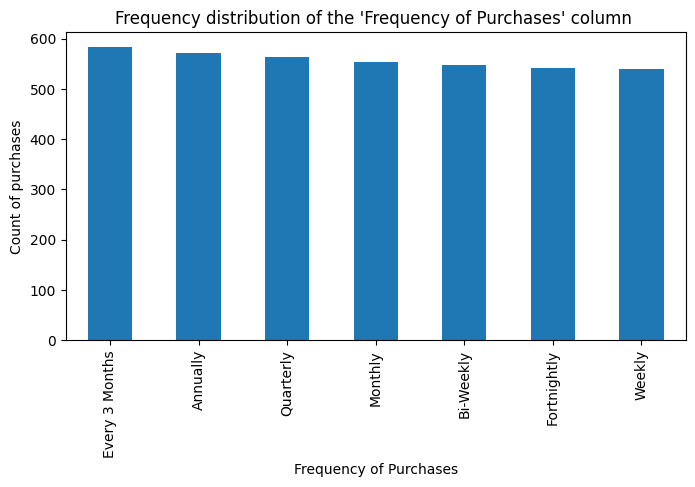

In [ ]:
fd=df['Frequency of Purchases'].value_counts()
fd.plot(kind='bar',figsize=(8,4))
plt.title("Frequency distribution of the 'Frequency of Purchases' column ")
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count of purchases')
plt.show()

Q-26 What is the average purchase amount for each color of items ?

In [ ]:
apac=df[['Color','Purchase Amount (USD)']].groupby(by='Color').mean().round(2).sort_values('Purchase Amount (USD)',ascending=False,axis=0)
apac=apac.reset_index()
apac.rename(columns={'Purchase Amount (USD)':'Avg. purchase amount'},inplace=True)
apac

,Color,Avg. purchase amount
0,Green,65.70
1,White,62.64
2,Gray,62.49
3,Cyan,61.89
4,Violet,61.72
5,Gold,61.01
6,Orange,60.89
7,Teal,60.81
8,Charcoal,60.63
9,Pink,60.59


Q-27 What is the most common payment method for customers who purchased items in the Fall season ?

In [ ]:
mcppf=df[df['Season']=='Fall']['Payment Method'].value_counts().idxmax()
print(mcppf,'is the most common payment method for customers who purchased items in the Fall season')

Credit Card is the most common payment method for customers who purchased items in the Fall season


Q-28 What is the total purchase amount for each size of clothing items (XL, L, M, S) ?

In [ ]:
tpac=df[['Size','Purchase Amount (USD)']].groupby(by='Size').sum().sort_values('Purchase Amount (USD)',ascending=False,axis=0)
tpac=tpac.reset_index()
tpac.rename(columns={'Purchase Amount (USD)':'Total Purchase Amount(USD)'},inplace=True)
tpac

,Size,Total Purchase Amount(USD)
0,M,105167
1,L,61667
2,S,40468
3,XL,25779


Q-29 What is the most common location for customers who purchased socks with a discount applied ?

In [ ]:
mcl=df[(df['Item Purchased']=='Socks')&(df['Discount Applied']=='Yes')]['Location'].value_counts().idxmax()
print(mcl,'is the most common location for customers who purchased socks with a discount applied')

Nevada is the most common location for customers who purchased socks with a discount applied
